##Market Capitalization Analysis project
* Analysing client base based on market cap at one point in time.
* Indentifying Key Perfomance Metrics
* What are the key drivers of market capitalization in this database


In [ ]:
import pandas as pnd
import numpy as nmp
import matplotlib.pyplot as plt
import seaborn as sbn

In [ ]:
dataA = pnd.read_csv("Balance_Sheet_final.csv")
dataB = pnd.read_csv("other_metrics_final.csv")
dataC = pnd.read_csv("cash_flow_statments_final.csv")

In [ ]:
dfA = dataA.copy()
dfB = dataB.copy()
dfC = dataC.copy()

In [ ]:
# Info from SOFP

dfA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4668 entries, 0 to 4667
Data columns (total 51 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Name                                     4668 non-null   object 
 1   BSE Code                                 4668 non-null   float64
 2   NSE Code                                 4668 non-null   object 
 3   Industry                                 4668 non-null   object 
 4   Current Price                            4667 non-null   float64
 5   Debt                                     4652 non-null   float64
 6   Equity capital                           4632 non-null   float64
 7   Preference capital                       4559 non-null   float64
 8   Reserves                                 4652 non-null   float64
 9   Secured loan                             4559 non-null   float64
 10  Unsecured loan                           4559 no

In [ ]:
# Perfomance metrics
# Financial ratios
dfB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4668 entries, 0 to 4667
Data columns (total 44 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Name                                      4668 non-null   object 
 1   BSE Code                                  4668 non-null   float64
 2   NSE Code                                  4668 non-null   object 
 3   Industry                                  4668 non-null   object 
 4   Current Price                             4667 non-null   float64
 5   Price to Sales                            4367 non-null   float64
 6   Price to Free Cash Flow                   4499 non-null   float64
 7   EVEBITDA                                  4636 non-null   float64
 8   Current ratio                             4629 non-null   float64
 9   Interest Coverage Ratio                   3907 non-null   float64
 10  PEG Ratio                           

In [ ]:
# Infomation from Statement of Cash Flows

dfC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4668 entries, 0 to 4667
Data columns (total 36 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Name                                 4668 non-null   object 
 1   BSE Code                             4668 non-null   float64
 2   NSE Code                             4668 non-null   object 
 3   Industry                             4668 non-null   object 
 4   Current Price                        4667 non-null   float64
 5   Cash from operations last year       4653 non-null   float64
 6   Free cash flow last year             4653 non-null   float64
 7   Cash from investing last year        4653 non-null   float64
 8   Cash from financing last year        4653 non-null   float64
 9   Net cash flow last year              4653 non-null   float64
 10  Cash beginning of last year          4653 non-null   float64
 11  Cash end of last year         

##Step 1: Data Preparation
* Manipulating the format of the data to make more functional to analyse .
* Also called feature engineering.
* Dealing with missing data.

In [ ]:
# Drop the following numerical columns
# They all contain primary keys

colsA = ['BSE Code', 'NSE Code', 'join_key']

dfA = dfA.drop(colsA, axis=1)

In [ ]:
cols_net_block = ['Net block', 'Net block preceding year','Net block 3Years back',
                  'Net block 5Years back', 'Net block 7Years back']
cols_debt = ['Debt', 'Debt preceding year','Debt 3Years back', 'Debt 5Years back',
             'Debt 7Years back','Debt 10Years back']
cols_working_capital = ['Working capital','Working capital preceding year','Working capital 3Years back' ,
                        'Working capital 5Years back','Working capital 7Years back', 'Working capital 10Years back']

In [ ]:
dfA['Average working capital'] = dfA[cols_working_capital].mean(axis=1)
dfA['Average net block'] = dfA[cols_net_block].mean(axis=1)
dfA['Average debt'] = dfA[cols_debt].mean(axis=1)

In [ ]:
dffA = dfA.copy()

In [ ]:
dffA = dffA.drop(cols_debt, axis=1)
dffA = dffA.drop(cols_net_block, axis=1)
dffA = dffA.drop(cols_working_capital, axis=1)

In [ ]:
dfA_final = dffA.copy()

In [ ]:
dfB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4668 entries, 0 to 4667
Data columns (total 44 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Name                                      4668 non-null   object 
 1   BSE Code                                  4668 non-null   float64
 2   NSE Code                                  4668 non-null   object 
 3   Industry                                  4668 non-null   object 
 4   Current Price                             4667 non-null   float64
 5   Price to Sales                            4367 non-null   float64
 6   Price to Free Cash Flow                   4499 non-null   float64
 7   EVEBITDA                                  4636 non-null   float64
 8   Current ratio                             4629 non-null   float64
 9   Interest Coverage Ratio                   3907 non-null   float64
 10  PEG Ratio                           

In [ ]:
cols_ratios = ['Name','Market Capt to Cash Flow', 'Market cap to quarterly profit', 'CROIC', 'Interest Coverage',
               'Total Capital Employed', 'EVEBITDA', 'Leverage', 'ROCE3yr avg']

dfB_final = dfB[cols_ratios]

In [ ]:
# Cash flows
dfC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4668 entries, 0 to 4667
Data columns (total 36 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Name                                 4668 non-null   object 
 1   BSE Code                             4668 non-null   float64
 2   NSE Code                             4668 non-null   object 
 3   Industry                             4668 non-null   object 
 4   Current Price                        4667 non-null   float64
 5   Cash from operations last year       4653 non-null   float64
 6   Free cash flow last year             4653 non-null   float64
 7   Cash from investing last year        4653 non-null   float64
 8   Cash from financing last year        4653 non-null   float64
 9   Net cash flow last year              4653 non-null   float64
 10  Cash beginning of last year          4653 non-null   float64
 11  Cash end of last year         

In [ ]:

# Separating cashflows by year
cols_cash = ['Cash 3Years back', 'Cash 5Years back', 'Cash 7Years back', 'Cash end of preceding year', 'Cash end of last year']

cols_financing = ['Cash from financing last year', 'Cash from financing preceding year']

cols_net_cash = ['Net cash flow last year', 'Net cash flow preceding year']

cols_free_cash = ['Free cash flow 3years', 'Free cash flow 5years', 'Free cash flow 7years', 'Free cash flow 10years', 'Free cash flow preceding year',
                  'Free cash flow last year']
cols_operations = ['Cash from operations preceding year','Cash from operations last year','Operating cash flow 3years', 'Operating cash flow 5years', 'Operating cash flow 7years',
                   'Operating cash flow 10years']
cols_investment = ['Investing cash flow 10years', 'Investing cash flow 7years', 'Investing cash flow 5years',
                   'Investing cash flow 3years', 'Cash from investing preceding year', 'Cash from investing preceding year']
cols_average_flows = ['Name', 'Average cash', 'Average financing cash', 'Average net cash', 'Average free cash',
                      'Average operations cashflows', 'Average investment cashflows']

In [ ]:
# Add an additional column for each commpany's average cahsflows for the timeframe provided
dfC['Average cash'] = dfC[cols_cash].mean(axis=1)
dfC['Average financing cash'] = dfC[cols_financing].mean(axis=1)
dfC['Average net cash'] = dfC[cols_net_cash].mean(axis=1)
dfC['Average free cash'] = dfC[cols_free_cash].mean(axis=1)
dfC['Average operations cashflows'] = dfC[cols_operations].mean(axis=1)
dfC['Average investment cashflows'] = dfC[cols_investment].mean(axis=1)

In [ ]:
cols_average_flows = ['Name', 'Average cash', 'Average financing cash', 'Average net cash', 'Average free cash',
                      'Average operations cashflows', 'Average investment cashflows']

In [ ]:
dffC_cashflows = dfC[cols_average_flows]

In [ ]:
dffC_cashflows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4668 entries, 0 to 4667
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          4668 non-null   object 
 1   Average cash                  4640 non-null   float64
 2   Average financing cash        4656 non-null   float64
 3   Average net cash              4656 non-null   float64
 4   Average free cash             4656 non-null   float64
 5   Average operations cashflows  4656 non-null   float64
 6   Average investment cashflows  4621 non-null   float64
dtypes: float64(6), object(1)
memory usage: 255.4+ KB


In [ ]:
dfc_final = dffC_cashflows.copy()

In [ ]:
ab = pnd.merge(dfA_final, dfB_final, on='Name', how='inner')

In [ ]:
abc = pnd.merge(ab, dfc_final, on='Name', how='inner')

In [ ]:
main_df = abc.copy()

In [ ]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4668 entries, 0 to 4667
Data columns (total 48 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Name                                     4668 non-null   object 
 1   Industry                                 4668 non-null   object 
 2   Current Price                            4667 non-null   float64
 3   Equity capital                           4632 non-null   float64
 4   Preference capital                       4559 non-null   float64
 5   Reserves                                 4652 non-null   float64
 6   Secured loan                             4559 non-null   float64
 7   Unsecured loan                           4559 non-null   float64
 8   Balance sheet total                      4652 non-null   float64
 9   Gross block                              4559 non-null   float64
 10  Revaluation reserve                      4559 no

In [ ]:
client_database = main_df.copy()

In [ ]:
# Filling every null value with the mean of each column for numericals

numerical_cols = main_df.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    if main_df[col].isnull().any():
        mean_value = main_df[col].mean()
        main_df[col].fillna(mean_value, inplace=True)

/tmp/ipython-input-3019017768.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  main_df[col].fillna(mean_value, inplace=True)


In [ ]:
# Create additional feature for companies below R9600 and above.
# Obtained from applying the central limit theorem
main_df['Market cap divide'] = nmp.where(main_df['Market Capitalization'] < 9600, 1, 0)

In [ ]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4668 entries, 0 to 4667
Data columns (total 49 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Name                                     4668 non-null   object 
 1   Industry                                 4668 non-null   object 
 2   Current Price                            4668 non-null   float64
 3   Equity capital                           4668 non-null   float64
 4   Preference capital                       4668 non-null   float64
 5   Reserves                                 4668 non-null   float64
 6   Secured loan                             4668 non-null   float64
 7   Unsecured loan                           4668 non-null   float64
 8   Balance sheet total                      4668 non-null   float64
 9   Gross block                              4668 non-null   float64
 10  Revaluation reserve                      4668 no

In [ ]:
# Save the data to local storage

#from google.colab import files

In [ ]:
market_cap_data = main_df.copy()

In [ ]:
#market_cap_data.to_csv('market_cap_data.csv', index=False)
#files.download('market_cap_data.csv')

##Step 2: Population Mean Inference
* Use the central limit theorem to estimate true mean.
* And boostrapping.

In [ ]:
# This function returns a numpy arrray with the means from CLT
# Returns mean,variance and median
# Function can be used for bootstrapping if samples_size = size of target_col


def central_limit_theorem(X, target_col, no_samples, samples_size):
  sample_means = []

  population_data = X[target_col]

  for _ in range(no_samples):
    sample = population_data.sample(n=samples_size, replace=True)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

  samples_mean = nmp.mean(sample_means)
  samples_median = (nmp.median(sample_means))/samples_size
  samples_variance = nmp.median(sample_means)
  print(f"Population mean: {samples_mean:.3f}")
  print(f"CLT variance: {samples_variance:.3f}")
  print(f"Population median: {samples_median:.3f}")

  return sample_means



In [ ]:
# This function draws the distribution of the means provided a numpy array with the means

def draw_plot(Y,m,n):
  mean = nmp.mean(Y)

  plt.figure(figsize=(m,n))
  sbn.histplot(Y, kde=True, color='skyblue', label='Samples Means Distribution')
  plt.axvline(mean, color='red', label=f"Population mean: {mean:.2f}")
  plt.xlabel("Sample Means")
  plt.ylabel("Frequency")
  plt.legend()
  plt.grid(True)
  plt.show()

In [ ]:
clt_i = central_limit_theorem(main_df, "Market Capitalization", 2000, 40)

Population mean: 9849.465
CLT variance: 6914.109
Population median: 172.853


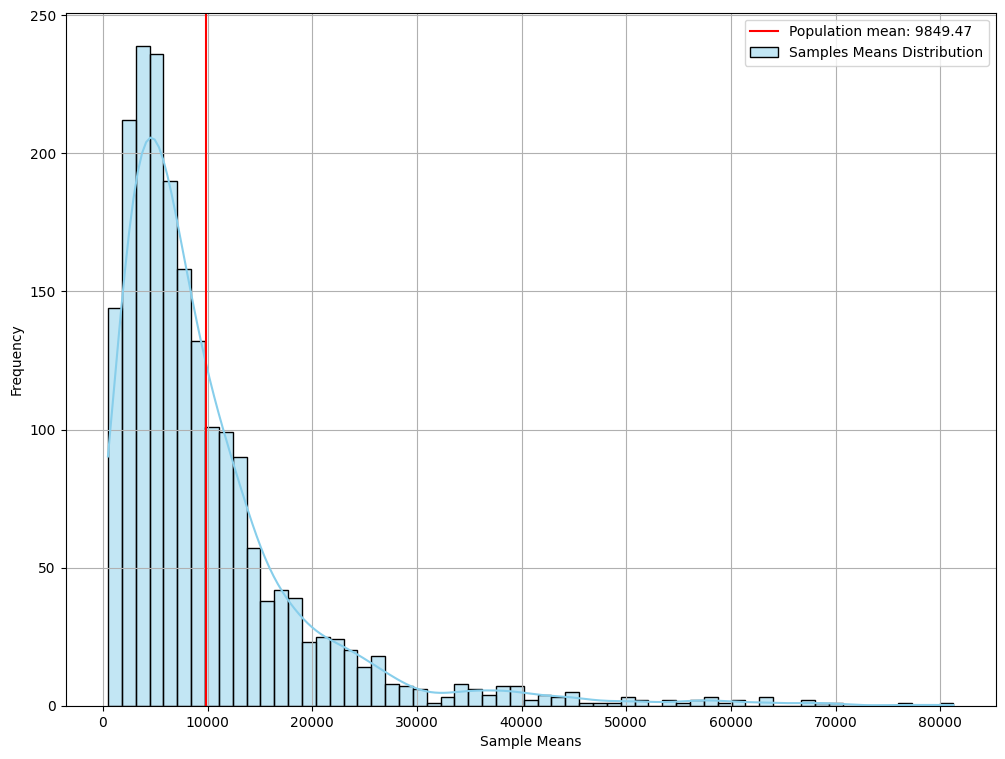

In [ ]:
draw_plot(clt_i, 12,9)

In [ ]:
clt_ii = central_limit_theorem(main_df, "Market Capitalization", 6000, 50)

Population mean: 9438.400
CLT variance: 7171.445
Population median: 143.429


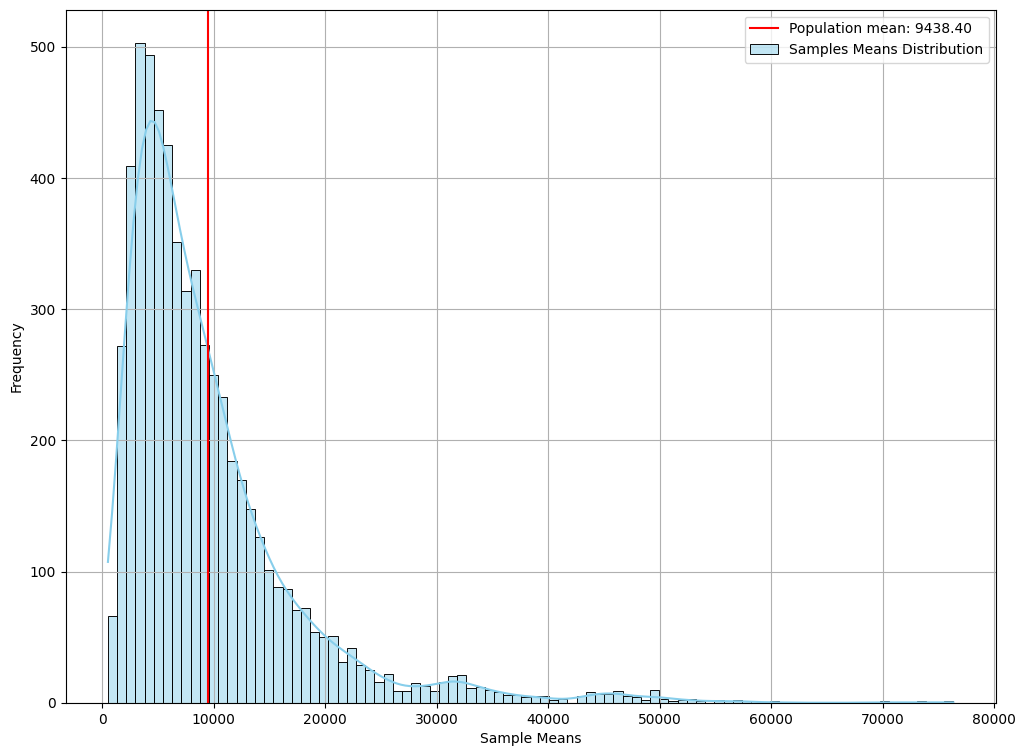

In [ ]:
draw_plot(clt_ii, 12,9)

In [ ]:
clt_iii = central_limit_theorem(main_df, "Market Capitalization", 4000, 38)

Population mean: 9572.396
CLT variance: 6484.533
Population median: 170.646


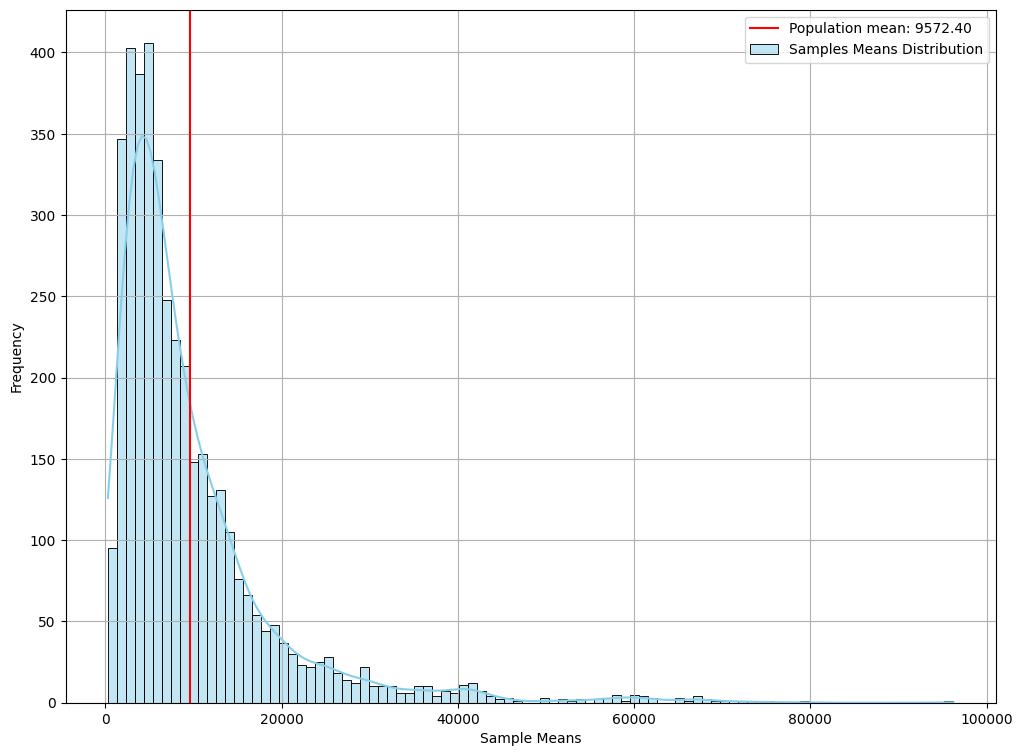

In [ ]:
draw_plot(clt_iii, 12,9)

In [ ]:
clt_iv = central_limit_theorem(main_df, "Market Capitalization", 5000, 60)

Population mean: 9649.575
CLT variance: 7509.251
Population median: 125.154


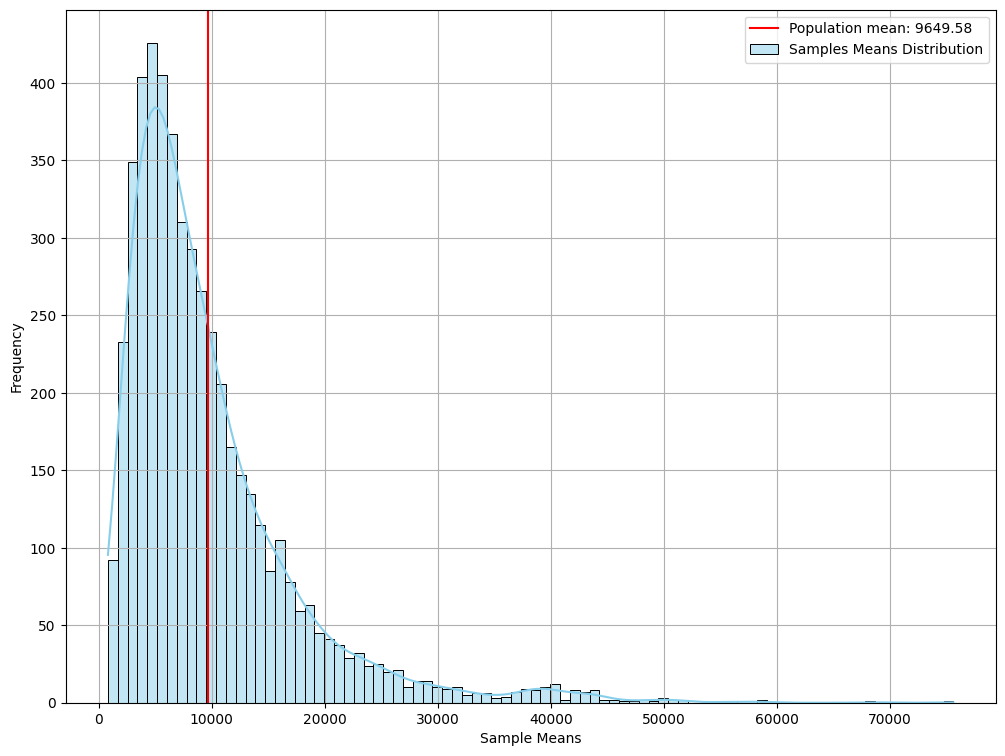

In [ ]:
draw_plot(clt_iv, 12,9)

In [ ]:
# Average out all the means and the variances
avg_mean = 0.25*(9482.593+9792.522+9497.558+9675.770)
avg_var = 0.25*(6265.497+7529.659+7251.605+6284.525)

print("Average Mean:",avg_mean)
print("Average Variance:", avg_var)
"Values will vary each time the code is run due to the randomization during clt"

Average Mean: 9612.11075
Average Variance: 6832.8215


'Values will vary each time the code is run due to the randomization during clt'

In [ ]:
from scipy import stats

In [ ]:
# Perform a t-test to the mean
# Null: True mean = R7800
# Alternataive: True mean != R7800
# Use clt sample variance

stat_numerator = 7800-(main_df['Market Capitalization'].mean())
stat_denominator_a = ((main_df['Market Capitalization'].var())/4668)**0.5

test_stat_a = stat_numerator/stat_denominator_a


# Function returns upper tail
p_value_a = (2* stats.t.sf(abs(test_stat_a), 4667))

In [ ]:
print("Test with sample variance:")
print(f'Test Statistic: {test_stat_a:.3f}')
print(f'P-value: {p_value_a:.3f}')
""" We have insufficient evidence to reject the null hypothesis"""

Test with sample variance:
Test Statistic: -1.995
P-value: 0.046


' We have insufficient evidence to reject the null hypothesis'

In [ ]:
Mean_bootstrap = central_limit_theorem(main_df,'Market Capitalization',8000, 4667)

Population mean: 9534.242
CLT variance: 9488.516
Population median: 2.033


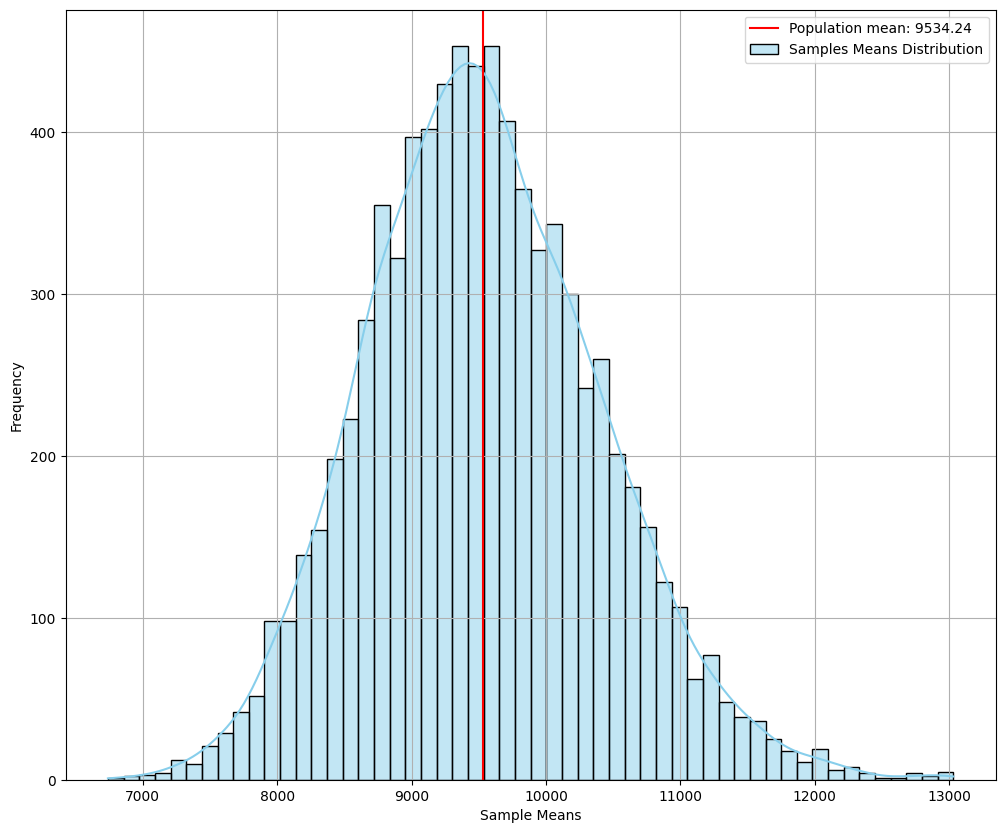

In [ ]:
draw_plot(Mean_bootstrap, 12 ,10)

In [ ]:
# Perform another test
# Null: True Mean = R7600
# Alternative: True Mean < R7600

Mean_bootstrap_array = nmp.array(Mean_bootstrap)
mean_above = (Mean_bootstrap_array < 7600).sum()
pvalue_boot = ((2*mean_above)/8000)
print(f'The p-value is: {pvalue_boot :.3f}')
"""Again we fail to reject the null hypothesis due to insufficient evidence"""

The p-value is: 0.016


'Again we fail to reject the null hypothesis due to insufficient evidence'

## Step 3: Sample Statistics
* Summary information about market capitalization
* Notable strong correlations

In [ ]:
# Divide the dataset into two by market cap of R8000

cap_below = main_df[main_df['Market Capitalization'] < 8000]
cap_above = main_df[main_df['Market Capitalization'] > 8000]

outliers_above = main_df[main_df['Market Capitalization'] > 500000]
outliers_below = main_df[main_df['Market Capitalization'] < 196] # Below the meadian

In [ ]:
cols_analyse = ['Market Capitalization', 'Reserves', 'Net worth', 'Average operations cashflows',
                'Average free cash', 'Current Price', 'Cash by market cap', 'Accumulated depreciation',
                'Balance sheet total', 'Capital work in progress', 'Average net cash',
                'Average net block', 'Trade receivables']

In [ ]:
bel_out_high = outliers_below[outliers_below['Market Capitalization'] > 83.855]

In [ ]:
outliers_above[["Reserves", 'Net worth', 'Current Price', 'Average operations cashflows', 'Average investment cashflows']].describe()

,Reserves,Net worth,Current Price,Average operations cashflows,Average investment cashflows
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,215871.985000,218145.113000,1778.730000,146081.696167,-93709.907250
std,233049.336746,234141.094789,1100.026155,133033.360050,149437.027311
min,50983.000000,51218.000000,425.700000,16441.653333,-431499.166667
25%,77101.952500,82200.817500,1048.762500,48227.370000,-127105.571875
50%,88086.000000,89302.500000,1517.050000,91218.545000,-13230.247500
75%,269934.900000,270702.572500,2299.500000,206199.036667,-5053.500417
max,786715.000000,793481.000000,3960.000000,421148.166667,2253.643333


In [ ]:
outliers_above[["Name", "Industry", "Market Capitalization", "Inventory", "Current assets", "Average free cash", "Face value", "Accumulated depreciation"]].head(10)

,Name,Industry,Market Capitalization,Inventory,Current assets,Average free cash,Face value,Accumulated depreciation
578,Bharti Airtel,Telecommunications - Service Provider,871693.35,363.90,58276.10,94297.366667,5.0,199860.00
1588,HDFC Bank,Banks - Private Sector,1290603.85,0.00,341177.83,5702.046667,1.0,12936.32
1626,Hind. Unilever,Personal Care - Multinational,587527.06,4022.00,16766.00,35684.685000,1.0,5504.00
1693,ICICI Bank,Banks - Private Sector,846453.45,0.00,216382.44,299810.123333,2.0,11355.54
1810,Infosys,Computers - Software - Large,653923.54,0.00,76517.00,79205.666667,5.0,21573.00
1881,ITC,Cigarettes,531474.65,14152.88,41065.54,55783.890000,1.0,10757.14
2283,Life Insurance,Finance & Investments,630823.63,0.00,197099.31,92652.290000,10.0,4191.03
3308,Reliance Industr,Refineries,2114992.82,152770.00,470100.00,-43808.500000,10.0,293187.00
3893,St Bk of India,Banks - Public Sector,753460.34,0.00,780703.07,32892.190000,1.0,39483.73
4135,TCS,Computers - Software - Large,1432762.64,28.00,81503.00,150594.546667,1.0,27814.00


In [ ]:
main_df[main_df['Face value'] > 50][["Name", "Face value"]].head()

,Name,Face value
639,Bombay Oxygen,100.0
1136,Embassy Off.REIT,300.0
1741,India Grid Trust,100.0
1919,Jamshri Realty,1000.0
2078,Kaushalya Infra.,1000.0


In [ ]:
numerical_cols = main_df.select_dtypes(include=[nmp.number])
correlations = numerical_cols.corr()['Market Capitalization'].sort_values(ascending=False)
print("Pearson correlation coefficients with 'Market Capitalization':")
print(correlations)

Pearson correlation coefficients with 'Market Capitalization':
Market Capitalization                      1.000000
Reserves                                   0.811773
Total Capital Employed                     0.746265
Current liabilities                        0.714162
Current assets                             0.678324
Gross block                                0.673903
Gross block preceding year                 0.671730
Trade Payables                             0.666592
Average net block                          0.663897
Trade receivables                          0.636857
Accumulated depreciation                   0.628459
Average operations cashflows               0.620417
Capital work in progress preceding year    0.588851
Cash Equivalents                           0.548146
Capital work in progress                   0.537928
Balance sheet total                        0.536261
Total Assets                               0.536261
Inventory                                  0.513802
A

In [ ]:
main_df['Average investment cashflows'].describe()

,Average investment cashflows
count,4668.000000
mean,-905.308966
std,9786.326510
min,-431499.166667
25%,-116.709875
50%,-8.682500
75%,0.028750
max,15540.418333


In [ ]:
outliers_above[['Name','Market Capitalization' ,'Average investment cashflows', 'Investments']].head(14)

,Name,Market Capitalization,Average investment cashflows,Investments
578,Bharti Airtel,871693.35,-158715.966667,31602.30
1588,HDFC Bank,1290603.85,-3675.458333,511581.71
1626,Hind. Unilever,587527.06,-6623.671667,4625.00
1693,ICICI Bank,846453.45,-275573.460000,639551.97
1810,Infosys,653923.54,-13766.333333,24623.00
1881,ITC,531474.65,-12694.161667,31114.02
2283,Life Insurance,630823.63,-32274.387500,4993128.29
3308,Reliance Industr,2114992.82,-431499.166667,225672.00
3893,St Bk of India,753460.34,-4530.110000,2110548.23
4135,TCS,1432762.64,2253.643333,31762.00


##Step 4: Feature Importace
* Ranking the variable in order of significance
* Use three models: Decision Tree, Random Forest and Gradient Boosting Algorithm.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
main_df['cap_above_8000'] = main_df['Market cap divide']
main_df['cap_below_8000'] = 1 - main_df['Market cap divide']

In [ ]:
main_df = main_df.drop('Market cap divide', axis=1)

In [ ]:
Y = main_df['Market Capitalization']
X = main_df.drop(['Name', 'Industry', 'Market Capitalization'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4668)

Model A: Decision Tree Regressor

In [ ]:
 # This is for models with default values
max_depth_values = list(range(1, 21))

train_sse_values = []
test_sse_values = []

for depth in max_depth_values:

    model = DecisionTreeRegressor(max_depth=depth, random_state=668)

    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_sse = ((y_train - y_train_pred)**2).sum()
    train_sse_values.append(train_sse)

    test_sse = ((y_test - y_test_pred)**2).sum()
    test_sse_values.append(test_sse)

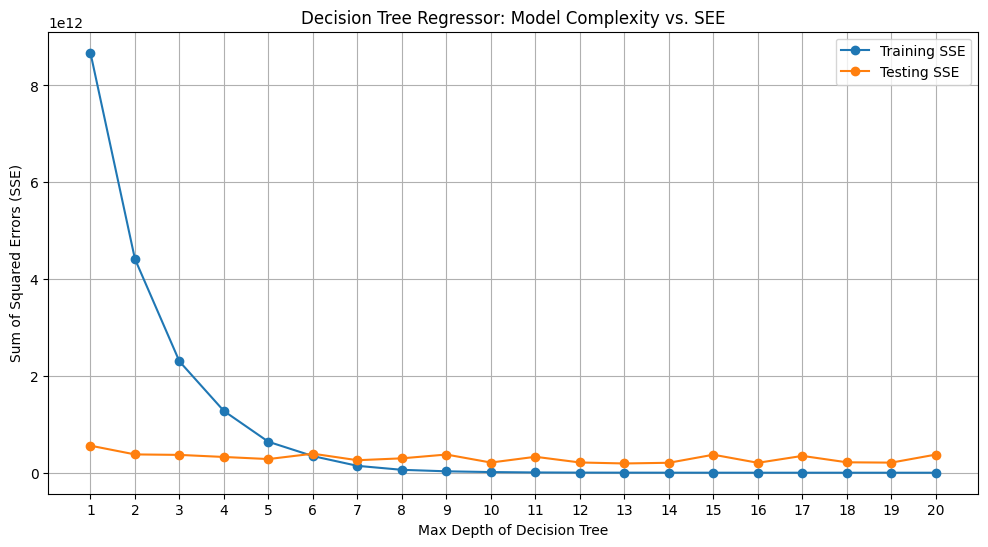

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(max_depth_values, train_sse_values, label='Training SSE', marker='o')
plt.plot(max_depth_values, test_sse_values, label='Testing SSE', marker='o')
plt.xlabel('Max Depth of Decision Tree')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Decision Tree Regressor: Model Complexity vs. SEE')
plt.xticks(max_depth_values)
plt.grid(True)
plt.legend()
plt.show()

Model: DecisionTree Regressor

In [ ]:
decision_tree_mod = DecisionTreeRegressor(random_state=668, max_depth=7,
                                          min_samples_split=2)

decision_tree_mod.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7, random_state=668)

In [ ]:
featimp_dectree_mod = decision_tree_mod.feature_importances_

feat_dectree = pnd.Series(featimp_dectree_mod, index=X.columns)

sort_feat_dectree = feat_dectree.sort_values(ascending=False)

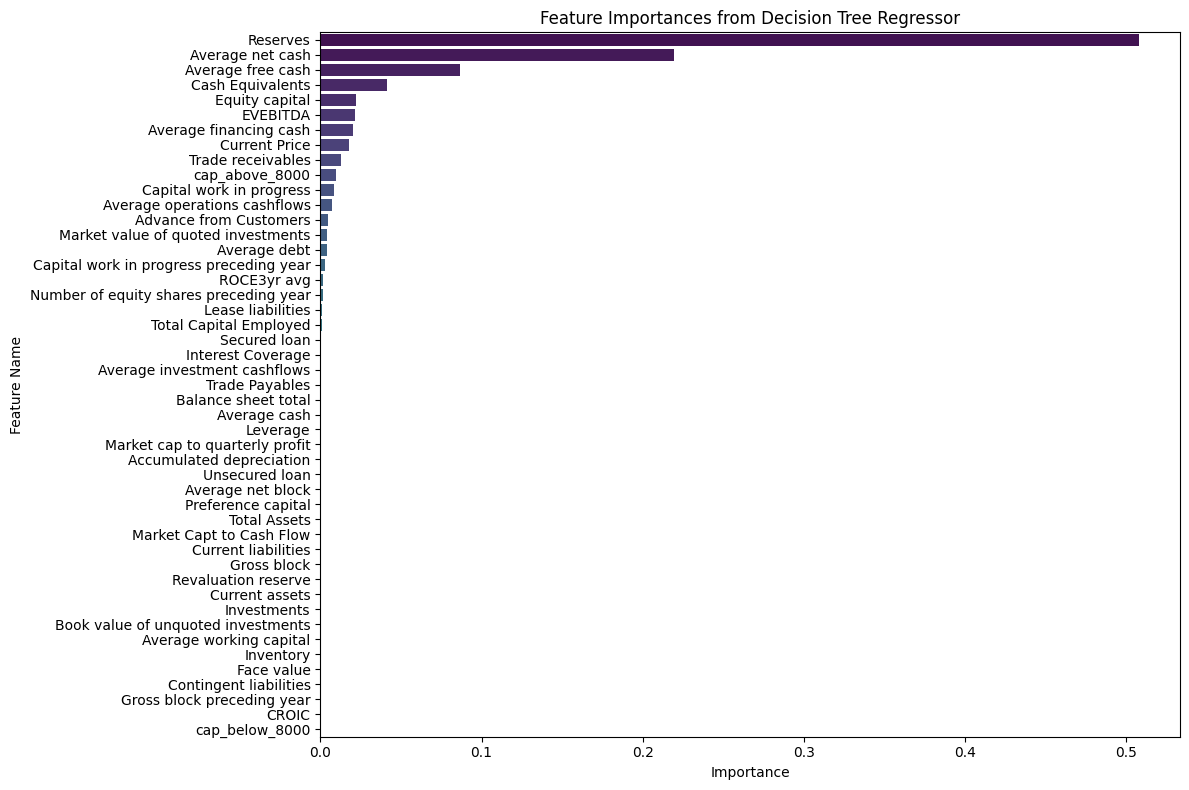

In [ ]:
# 4. Create a bar plot
plt.figure(figsize=(12, 8))
sbn.barplot(x=sort_feat_dectree.values, y=sort_feat_dectree.index, hue=sort_feat_dectree.index, palette='viridis', legend=False)
plt.title('Feature Importances from Decision Tree Regressor')
plt.xlabel('Importance')
plt.ylabel('Feature Name')
plt.tight_layout()

# 5. Display the plot
plt.show()

In [ ]:
y_train_pred_dt = decision_tree_mod.predict(X_train)
mse_train_dt = mean_squared_error(y_train, y_train_pred_dt)
r2_train_dt = r2_score(y_train, y_train_pred_dt)

print(f"Decision Tree Regressor - Training MSE: {mse_train_dt:.3f}")
print(f"Decision Tree Regressor - Training R-squared: {r2_train_dt:.3f}")


Decision Tree Regressor - Training MSE: 38083568.036
Decision Tree Regressor - Training R-squared: 0.991


In [ ]:
y_test_pred_dt = decision_tree_mod.predict(X_test)
mse_test_dt = mean_squared_error(y_test, y_test_pred_dt)
r2_test_dt = r2_score(y_test, y_test_pred_dt)

print(f"Decision Tree Regressor - Testing MSE: {mse_test_dt:.3f}")
print(f"Decision Tree Regressor - Testing R-squared: {r2_test_dt:.3f}")

Decision Tree Regressor - Testing MSE: 276487110.977
Decision Tree Regressor - Testing R-squared: 0.656


Model: Randomforest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
random_forest_mod = RandomForestRegressor(random_state=4668, criterion='squared_error', n_estimators=150,
                                          max_depth=10)

random_forest_mod.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=150, random_state=4668)

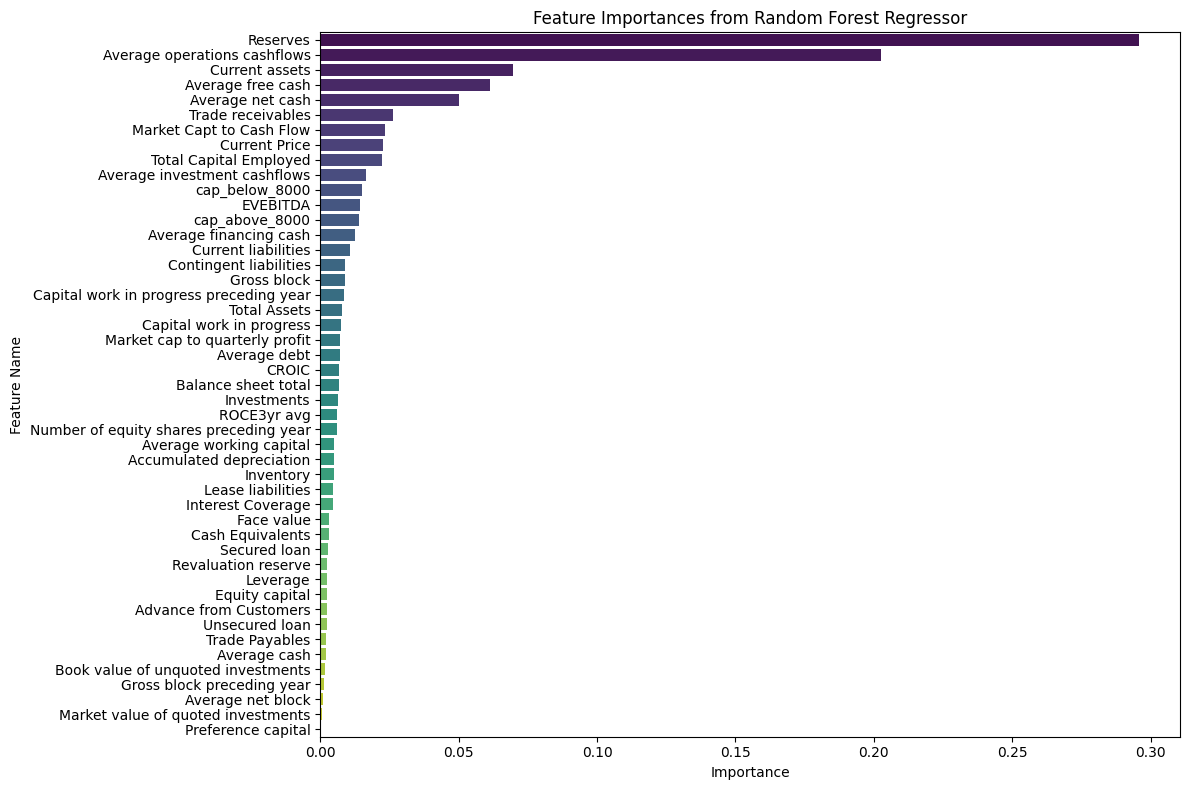

In [ ]:
featimp_randforest = random_forest_mod.feature_importances_

feat_df_randforest = pnd.Series(featimp_randforest, index=X.columns)

sort_feat_randforest = feat_df_randforest.sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sbn.barplot(x=sort_feat_randforest.values, y=sort_feat_randforest.index, hue=sort_feat_randforest.index, palette='viridis', legend=False)
plt.title('Feature Importances from Random Forest Regressor')
plt.xlabel('Importance')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()

In [ ]:
y_train_pred_rf = random_forest_mod.predict(X_train)
mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)
r2_train_rf = r2_score(y_train, y_train_pred_rf)

print(f"Random Forest Regressor - Training MSE: {mse_train_rf:.3f}")
print(f"Random Forest Regressor - Training R-squared: {r2_train_rf:.3f}")

Random Forest Regressor - Training MSE: 224377466.238
Random Forest Regressor - Training R-squared: 0.946


In [ ]:
y_test_pred_rf = random_forest_mod.predict(X_test)
mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)

print(f"Random Forest Regressor - Testing MSE: {mse_test_rf:.3f}")
print(f"Random Forest Regressor - Testing R-squared: {r2_test_rf:.3f}")

Random Forest Regressor - Testing MSE: 142287607.294
Random Forest Regressor - Testing R-squared: 0.823


Model: GradientBoosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gradient_boosting_mod = GradientBoostingRegressor(random_state=4668)
gradient_boosting_mod.fit(X_train, y_train)

GradientBoostingRegressor(random_state=4668)

In [ ]:
feat_imp_gradboost = gradient_boosting_mod.feature_importances_

feats_gradboost = pnd.Series(feat_imp_gradboost, index=X.columns)

sort_feat_gradboost = feats_gradboost.sort_values(ascending=False)

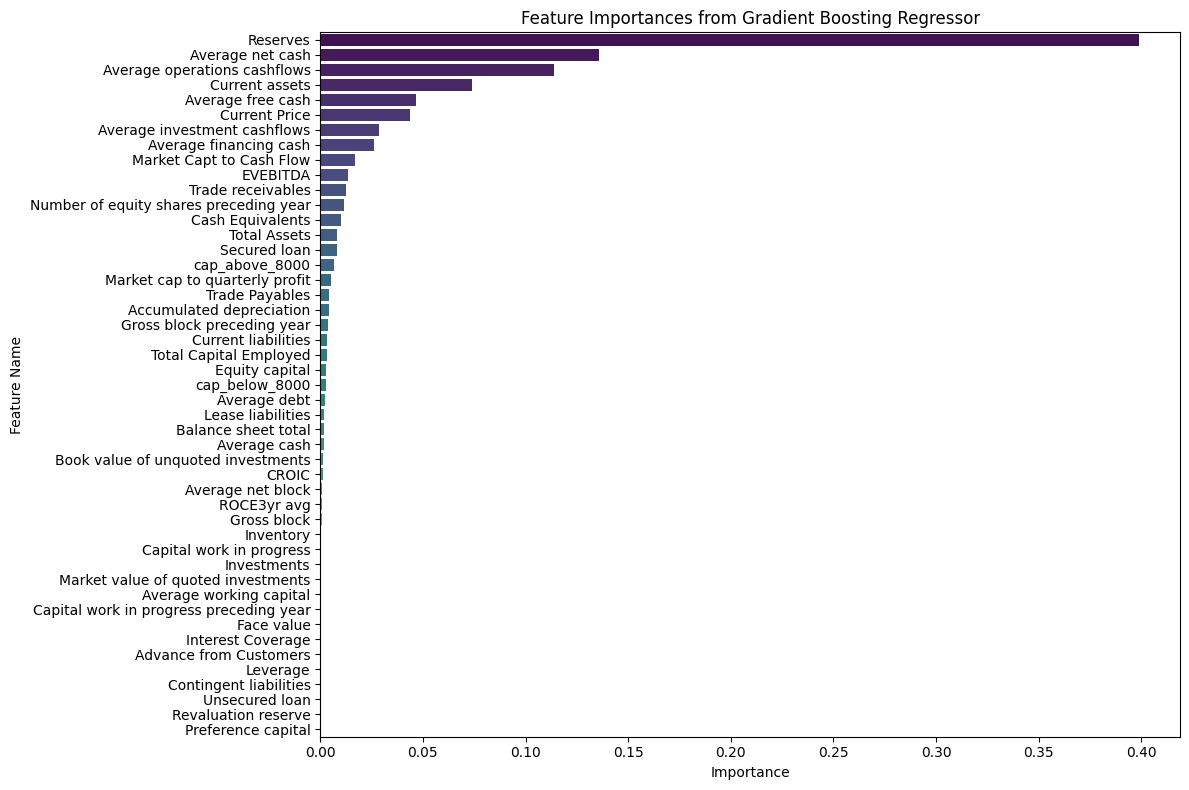

In [ ]:
plt.figure(figsize=(12, 8))
sbn.barplot(x=sort_feat_gradboost.values, y=sort_feat_gradboost.index, hue=sort_feat_gradboost.index, palette='viridis', legend=False)
plt.title('Feature Importances from Gradient Boosting Regressor')
plt.xlabel('Importance')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()

In [ ]:
y_train_pred_gb = gradient_boosting_mod.predict(X_train)
mse_train_gb = mean_squared_error(y_train, y_train_pred_gb)
r2_train_gb = r2_score(y_train, y_train_pred_gb)

print(f"Gradient Boosting Regressor - Training MSE: {mse_train_gb:.3f}")
print(f"Gradient Boosting Regressor - Training R-squared: {r2_train_gb:.3f}")

Gradient Boosting Regressor - Training MSE: 11177779.421
Gradient Boosting Regressor - Training R-squared: 0.997


In [ ]:
y_test_pred_gb = gradient_boosting_mod.predict(X_test)
mse_test_gb = mean_squared_error(y_test, y_test_pred_gb)
r2_test_gb = r2_score(y_test, y_test_pred_gb)

print(f"Gradient Boosting Regressor - Testing MSE: {mse_test_gb:.3f}")
print(f"Gradient Boosting Regressor - Testing R-squared: {r2_test_gb:.3f}")

Gradient Boosting Regressor - Testing MSE: 119670216.685
Gradient Boosting Regressor - Testing R-squared: 0.851


##Step 5: Clustering
* Cluster Analysis (KMeans clustering) for grouping.

In [ ]:
data_modelling = main_df.copy()

In [ ]:
data_modelling.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4668 entries, 0 to 4667
Data columns (total 50 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Name                                     4668 non-null   object 
 1   Industry                                 4668 non-null   object 
 2   Current Price                            4668 non-null   float64
 3   Equity capital                           4668 non-null   float64
 4   Preference capital                       4668 non-null   float64
 5   Reserves                                 4668 non-null   float64
 6   Secured loan                             4668 non-null   float64
 7   Unsecured loan                           4668 non-null   float64
 8   Balance sheet total                      4668 non-null   float64
 9   Gross block                              4668 non-null   float64
 10  Revaluation reserve                      4668 no

In [ ]:
data_modelling = data_modelling.drop(['Industry', 'Name'], axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
mod_data_stnd = scaler.fit_transform(data_modelling)

modelling_data_stnd = pnd.DataFrame(mod_data_stnd, columns=data_modelling.columns)

K-Means Cluster Analysis (SVD)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=6)


pca_data = pca.fit_transform(modelling_data_stnd)


pca_df = pnd.DataFrame(data=pca_data, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', "PC6"])

print(f"Explained variance ratio by PC1: {pca.explained_variance_ratio_[0]:.2f}")
print(f"Explained variance ratio by PC2: {pca.explained_variance_ratio_[1]:.2f}")
print(f"Explained variance ratio by PC3: {pca.explained_variance_ratio_[2]:.2f}")
print(f"Explained variance ratio by PC4: {pca.explained_variance_ratio_[3]:.2f}")
print(f"Explained variance ratio by PC5: {pca.explained_variance_ratio_[4]:.2f}")
print(f"Explained variance ratio by PC6: {pca.explained_variance_ratio_[5]:.2f}")
print(f"Total explained variance: {pca.explained_variance_ratio_.sum():.2f}")

Explained variance ratio by PC1: 0.31
Explained variance ratio by PC2: 0.15
Explained variance ratio by PC3: 0.05
Explained variance ratio by PC4: 0.05
Explained variance ratio by PC5: 0.04
Explained variance ratio by PC6: 0.03
Total explained variance: 0.63


In [ ]:
from sklearn.cluster import KMeans

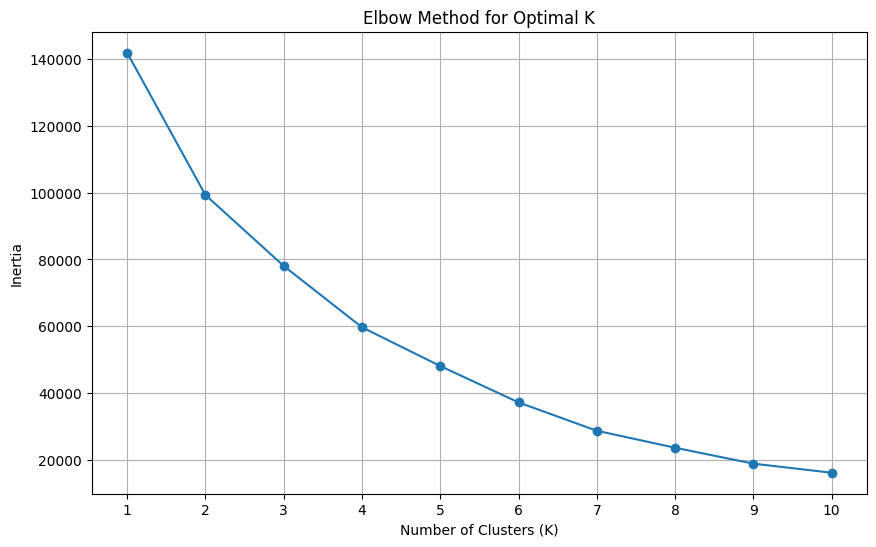

In [ ]:
inertia = []
max_clusters = 10 # You can adjust this range as needed

for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=4668, n_init=10)
    kmeans.fit(pca_df)
    inertia.append(kmeans.inertia_)

# Plot the scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(range(1, max_clusters + 1))
plt.grid(True)
plt.show()

In [ ]:
optimal_k = 5 # Based on the elbow plot, K=4 appears to be a reasonable elbow point

# 2. Apply K-Means clustering to the pca_df DataFrame
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=4668, n_init=10)
kmeans.fit(pca_df)

# 3. Add the cluster labels as a new column named 'Cluster' to the pca_df DataFrame
pca_df['Cluster'] = kmeans.labels_

In [ ]:
main_df_clustered = main_df.copy()
main_df_clustered['Kmeans cluster'] = pca_df['Cluster']

In [ ]:
main_df_clustered['Kmeans cluster'].describe()

,Kmeans cluster
count,4668.000000
mean,0.015853
std,0.209495
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,4.000000


In [ ]:
print("Number of observations in each cluster:")
display(main_df_clustered['Kmeans cluster'].value_counts())

Number of observations in each cluster:


,count
Kmeans cluster,
0,4640
3,17
2,9
4,1
1,1


##Step 6: Visuals
* Visualizations showing important details

In [ ]:
plots_data = main_df_clustered.copy()

In [ ]:
industry_market_cap = plots_data.groupby('Industry')['Market Capitalization'].sum().reset_index()
total_market_cap = industry_market_cap['Market Capitalization'].sum()
industry_market_cap['Proportion'] = (industry_market_cap['Market Capitalization'] / total_market_cap) * 100

other_proportion = industry_market_cap[industry_market_cap['Proportion'] < 3]['Proportion'].sum()

filtered_market_cap = industry_market_cap[industry_market_cap['Proportion'] >= 3].copy()

if other_proportion > 0:
    other_row = pnd.DataFrame([{'Industry': 'Other', 'Market Capitalization': None, 'Proportion': other_proportion}])
    filtered_market_cap = pnd.concat([filtered_market_cap, other_row], ignore_index=True)

filtered_market_cap = filtered_market_cap.sort_values(by='Proportion', ascending=False)

/tmp/ipython-input-1374597728.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  filtered_market_cap = pnd.concat([filtered_market_cap, other_row], ignore_index=True)


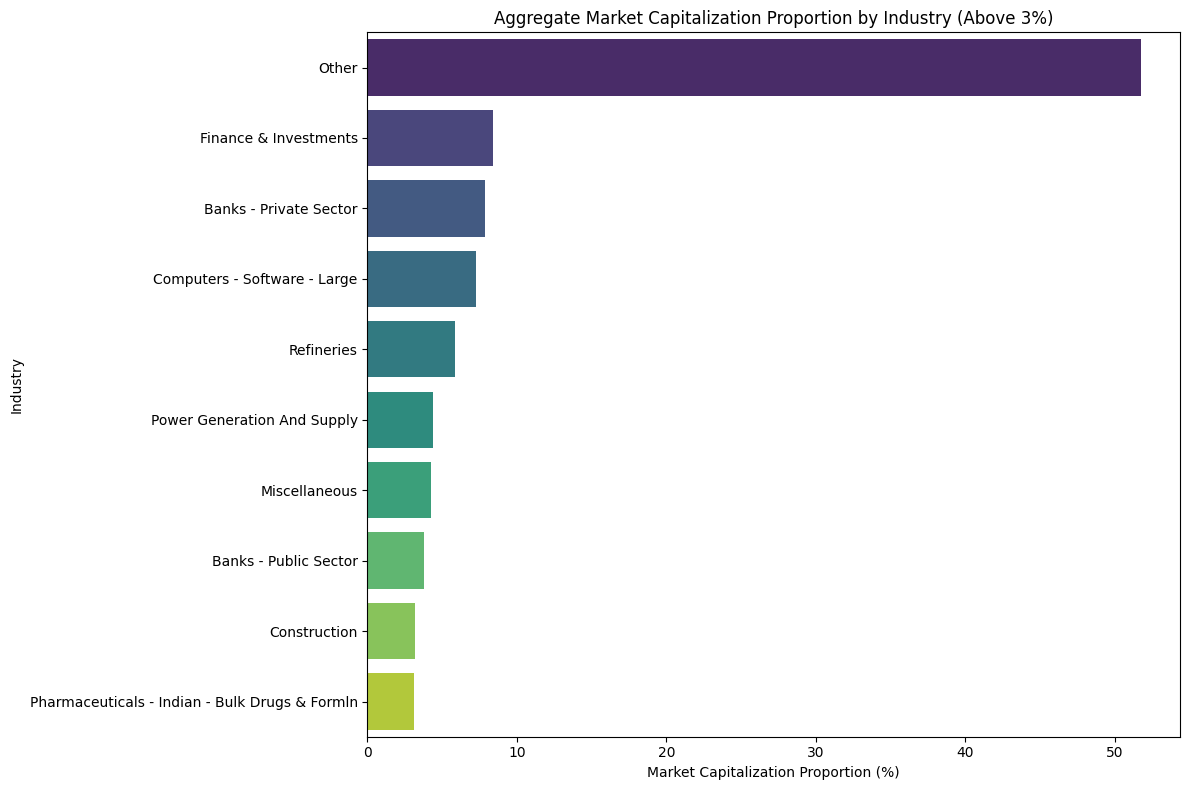

In [ ]:
plt.figure(figsize=(12, 8))
sbn.barplot(x='Proportion', y='Industry', data=filtered_market_cap, palette='viridis', hue='Industry', legend=False)
plt.xlabel('Market Capitalization Proportion (%)')
plt.ylabel('Industry')
plt.title('Aggregate Market Capitalization Proportion by Industry (Above 3%)')
plt.tight_layout()
plt.show()

In [ ]:
plots_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4668 entries, 0 to 4667
Data columns (total 51 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Name                                     4668 non-null   object 
 1   Industry                                 4668 non-null   object 
 2   Current Price                            4668 non-null   float64
 3   Equity capital                           4668 non-null   float64
 4   Preference capital                       4668 non-null   float64
 5   Reserves                                 4668 non-null   float64
 6   Secured loan                             4668 non-null   float64
 7   Unsecured loan                           4668 non-null   float64
 8   Balance sheet total                      4668 non-null   float64
 9   Gross block                              4668 non-null   float64
 10  Revaluation reserve                      4668 no

In [ ]:
plots_data[['cap_above_8000', 'cap_below_8000', 'Market Capitalization', "Name",'Kmeans cluster']].head()

,cap_above_8000,cap_below_8000,Market Capitalization,Name,Kmeans cluster
0,1,0,795.54,20 Microns,0
1,1,0,73.96,21st Cent. Mgmt.,0
2,0,1,36254.08,360 ONE,0
3,1,0,1024.98,3B Blackbio,0
4,1,0,26.55,3C IT Solutions,0


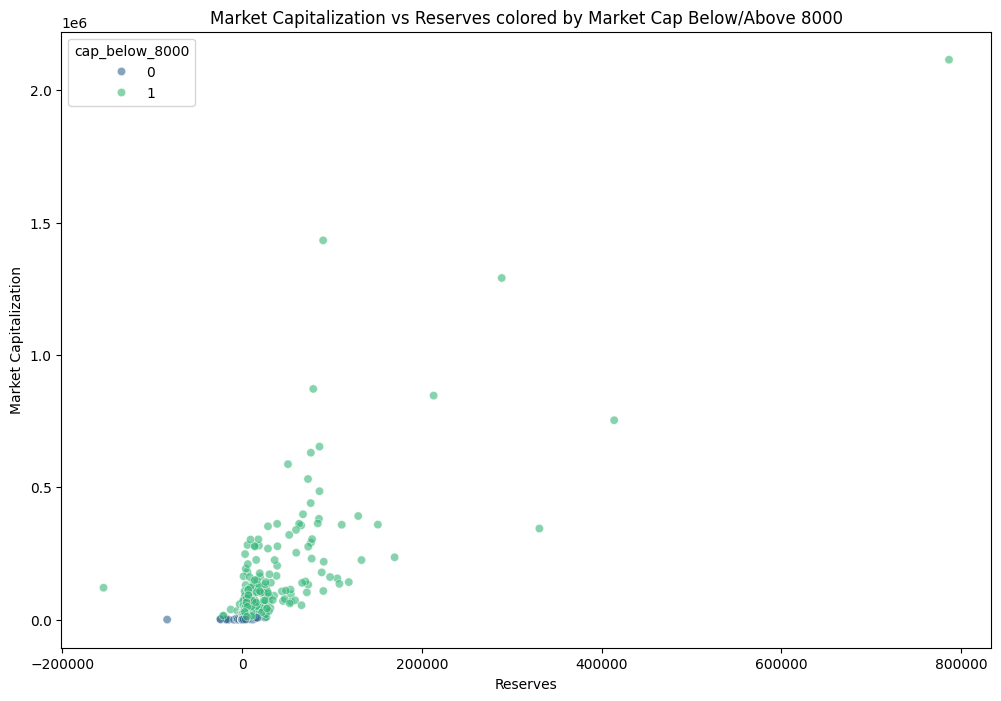

In [ ]:
plt.figure(figsize=(12, 8))
sbn.scatterplot(x='Reserves', y='Market Capitalization', hue='cap_below_8000', data=plots_data, palette='viridis', alpha=0.6)
plt.title('Market Capitalization vs Reserves colored by Market Cap Below/Above 8000')
plt.xlabel('Reserves')
plt.ylabel('Market Capitalization')
plt.grid(False)
plt.show()

In [ ]:
group_1 = main_df_clustered[main_df_clustered['Kmeans cluster'] == 1]
group_2 = main_df_clustered[main_df_clustered['Kmeans cluster'] == 2]
group_3 = main_df_clustered[main_df_clustered['Kmeans cluster'] == 3]
group_4 = main_df_clustered[main_df_clustered['Kmeans cluster'] == 4]




In [ ]:
group_3[['Name', 'Market Capitalization','Industry', 'Reserves', 'Average operations cashflows', "cap_above_8000"]].head(17)

,Name,Market Capitalization,Industry,Reserves,Average operations cashflows,cap_above_8000
452,B P C L,132497.98,Refineries,73498.82,83451.885000,0
578,Bharti Airtel,871693.35,Telecommunications - Service Provider,79142.20,220718.450000,0
813,Coal India,291158.06,Mining / Minerals / Metals,76567.05,99836.605000,0
1544,H P C L,70856.48,Refineries,45502.41,51760.403333,0
1639,Hindalco Inds.,156125.33,Aluminium and Aluminium Products,105924.00,75145.108333,0
1684,I O C L,235824.69,Refineries,169644.71,160123.988333,0
1810,Infosys,653923.54,Computers - Software - Large,86045.00,90106.000000,0
1994,JSW Steel,230716.36,Steel - Large,77364.00,75581.995000,0
2253,Larsen & Toubro,485369.51,Engineering - Turnkey Services,86084.31,57275.035000,0
2795,NTPC,359213.02,Power Generation And Supply,151012.60,146037.548333,0


In [ ]:
group_4[['Name', 'Market Capitalization','Kmeans cluster', 'Reserves']].describe()

,Market Capitalization,Kmeans cluster,Reserves
count,1.00,1.0,1.0
mean,2114992.82,4.0,786715.0
std,NaN,NaN,NaN
min,2114992.82,4.0,786715.0
25%,2114992.82,4.0,786715.0
50%,2114992.82,4.0,786715.0
75%,2114992.82,4.0,786715.0
max,2114992.82,4.0,786715.0


In [ ]:
group_1[['Name', 'Market Capitalization','Kmeans cluster', 'Reserves']].head(11)

,Name,Market Capitalization,Kmeans cluster,Reserves
3893,St Bk of India,753460.34,1,414046.71


In [ ]:
group_2[['Name', 'Market Capitalization','Kmeans cluster', 'Reserves']].describe()

,Market Capitalization,Kmeans cluster,Reserves
count,9.000000e+00,9.0,9.000000
mean,4.115280e+05,2.0,129193.966667
std,4.291365e+05,0.0,74710.033593
min,5.472303e+04,2.0,66027.850000
25%,1.085757e+05,2.0,76421.870000
50%,1.421607e+05,2.0,108184.530000
75%,6.308236e+05,2.0,129166.340000
max,1.290604e+06,2.0,288879.530000


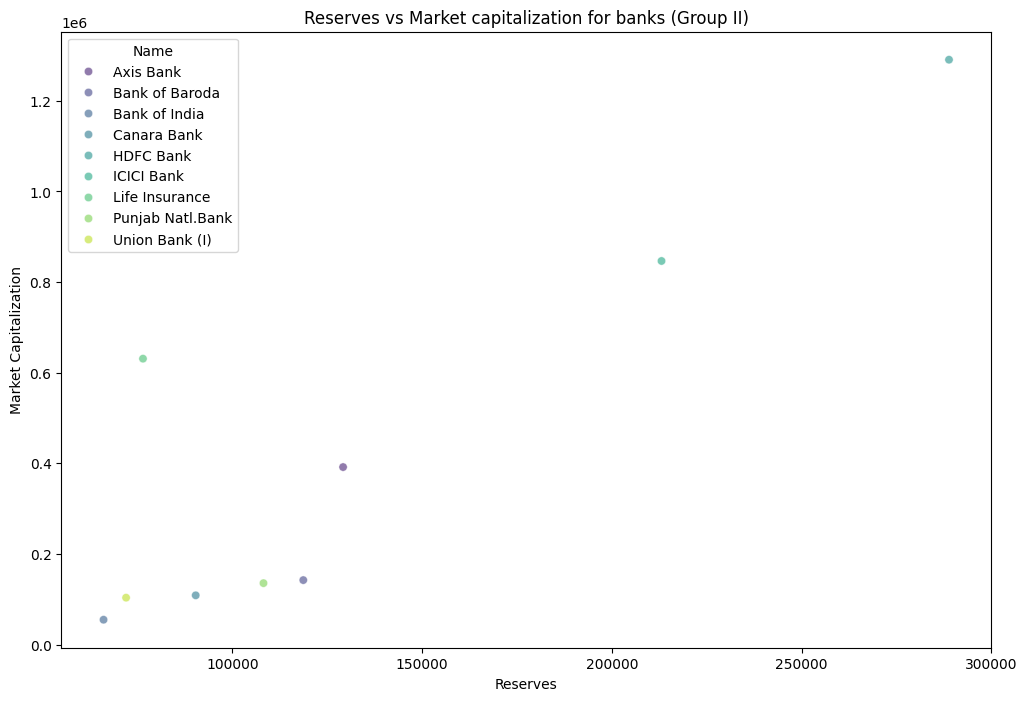

In [ ]:
plt.figure(figsize=(12, 8))
sbn.scatterplot(x='Reserves', y='Market Capitalization',hue='Name', data=group_2, palette='viridis', alpha=0.6)
plt.title('Reserves vs Market capitalization for banks (Group II)')
plt.xlabel('Reserves')
plt.ylabel('Market Capitalization')
plt.grid(False)
plt.show()

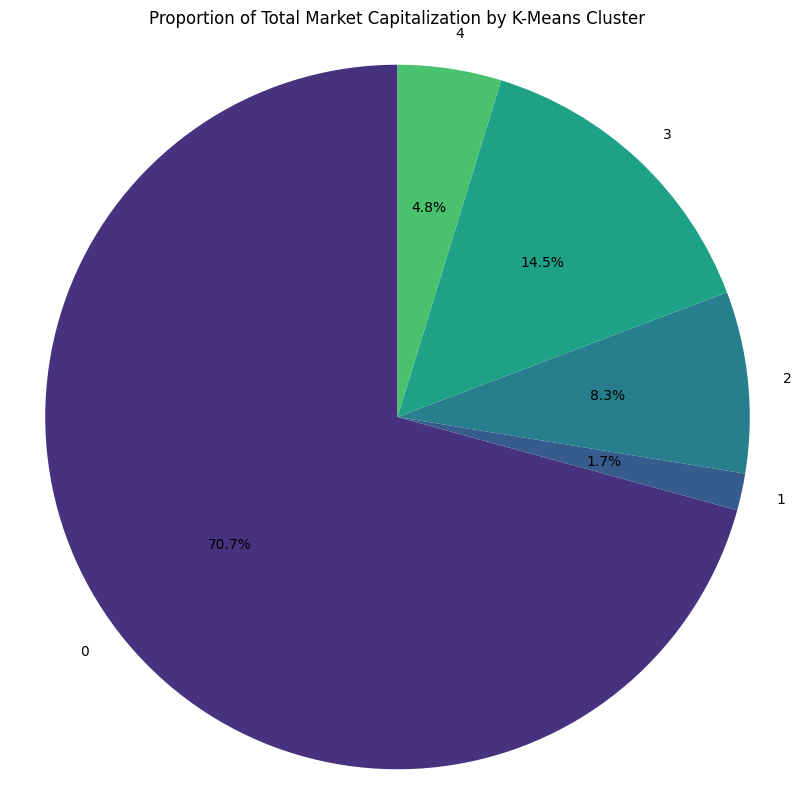

In [ ]:
cluster_market_cap = main_df_clustered.groupby('Kmeans cluster')['Market Capitalization'].sum().reset_index()
total_market_cap_clusters = cluster_market_cap['Market Capitalization'].sum()
cluster_market_cap['Proportion'] = (cluster_market_cap['Market Capitalization'] / total_market_cap_clusters) * 100

plt.figure(figsize=(10, 10))
plt.pie(cluster_market_cap['Proportion'], labels=cluster_market_cap['Kmeans cluster'], autopct='%1.1f%%', startangle=90, colors=sbn.color_palette('viridis'))
plt.title('Proportion of Total Market Capitalization by K-Means Cluster')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()